<a href="https://www.kaggle.com/code/koenbotermans/pytorch-vs-tensorflow-cnn?scriptVersionId=238429072" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Pytorch vs Tensorflow - CNN

In this notebook series I will give a code comparison between PyTorch and TensorFlow which is vital for understanding deep learning because these two libraries are the most widely used frameworks in the field, each with its own syntax, features, and paradigms. Having a "Rosetta Stone" to translate between them is super convenient as it allows practitioners to leverage the strengths of both libraries, facilitates learning and collaboration across different teams, and ensures that models and research can be easily adapted and shared within the deep learning community, enhancing flexibility and innovation.

## In this notebook
In the second notebook of this series, I will start with the basics by creating a simple Convolutional Neural Network (ANN) in both PyTorch and TensorFlow. We will train the CNN on the MNIST dataset, which consists of handwritten digit images, to illustrate fundamental concepts and workflows in each framework. This foundational exercise will set the stage for more complex models and comparisons in subsequent notebooks.

For both PyTorch and TensorFlow, the steps for training a model are essentially the same:

1. Importing the necessary libraries.
2. Defining the model parameters and hyperparameters.
3. Loading the dataset.
4. Preprocessing the data to make it suitable for training.
5. Initializing the model architecture.
6. Training the model using the defined parameters and dataset.

These steps form the core workflow in building and training deep learning models, regardless of the framework used.

# Tensorflow

In [1]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [2]:
# Plotting the training metrics with Plotly
def plot_training_history(history):
    fig = make_subplots(rows=1, cols=2, subplot_titles=("Loss Over Epochs", "Accuracy Over Epochs"))

    # Loss plot
    fig.add_trace(go.Scatter(x=list(range(len(history.history['loss']))),
                             y=history.history['loss'],
                             mode='lines',
                             name='Training Loss'),
                  row=1, col=1)
    fig.add_trace(go.Scatter(x=list(range(len(history.history['val_loss']))),
                             y=history.history['val_loss'],
                             mode='lines',
                             name='Validation Loss'),
                  row=1, col=1)

    # Accuracy plot
    fig.add_trace(go.Scatter(x=list(range(len(history.history['accuracy']))),
                             y=history.history['accuracy'],
                             mode='lines',
                             name='Training Accuracy'),
                  row=1, col=2)
    fig.add_trace(go.Scatter(x=list(range(len(history.history['val_accuracy']))),
                             y=history.history['val_accuracy'],
                             mode='lines',
                             name='Validation Accuracy'),
                  row=1, col=2)

    # Updating layout
    fig.update_layout(title='Training Metrics',
                      xaxis_title='Epoch',
                      yaxis_title='Value',
                      showlegend=True)

    # Update xaxis labels
    fig.update_xaxes(title_text='Epoch', row=1, col=1)
    fig.update_xaxes(title_text='Epoch', row=1, col=2)

    # Update yaxis labels
    fig.update_yaxes(title_text='Loss', row=1, col=1)
    fig.update_yaxes(title_text='Accuracy', row=1, col=2)

    fig.show()

In [3]:
#1. Importing the necessary libraries.
import tensorflow as tf
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.losses import CategoricalCrossentropy

from tensorflow.keras.datasets import mnist

# 2. Defining the model parameters and hyperparameters.
kernels_layer_1 = 32
kernels_layer_2 = 64
n_classes = 10
n_epochs = 10
batch_size = 32
learning_rate = 0.001

#3. Loading the dataset.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#4. Preprocessing the data to make it suitable for training.
x_train, x_test = x_train.astype(np.float32), x_test.astype(np.float32)
x_train = np.expand_dims(x_train, -1)
x_test  = np.expand_dims(x_test, -1)
x_train, x_test = x_train/255, x_test/255

y_train_encoded = np.zeros(shape=(y_train.shape[0], 10), dtype=int)
y_test_encoded = np.zeros(shape=(y_test.shape[0], 10), dtype=int)

y_train_encoded[np.linspace(0, len(y_train)-1, len(y_train)).astype(int), y_train]=1
y_test_encoded[np.linspace(0, len(y_test)-1, len(y_test)).astype(int), y_test]=1

# 5. Initializing the model architecture.
model = Sequential([
    Conv2D(kernels_layer_1, kernel_size=(3, 3), activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(kernels_layer_2, kernel_size=(3, 3), activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dropout(0.5),
    Dense(units=n_classes, activation="softmax")
])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss=CategoricalCrossentropy(), metrics=["accuracy"])

# 6. Training the model using the defined parameters and dataset.
callback = model.fit(x=x_train, y=y_train_encoded, validation_data=(x_test, y_test_encoded), batch_size=batch_size, epochs=n_epochs)

2025-05-07 19:24:13.839102: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-07 19:24:13.839249: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-07 19:24:14.010272: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 14ms/step - accuracy: 0.8595 - loss: 0.4405 - val_accuracy: 0.9830 - val_loss: 0.0521
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9732 - loss: 0.0840 - val_accuracy: 0.9859 - val_loss: 0.0429
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9810 - loss: 0.0607 - val_accuracy: 0.9889 - val_loss: 0.0343
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9835 - loss: 0.0511 - val_accuracy: 0.9900 - val_loss: 0.0291
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9860 - loss: 0.0436 - val_accuracy: 0.9903 - val_loss: 0.0270
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9881 - loss: 0.0382 - val_accuracy: 0.9912 - val_loss: 0.0252
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9877 - loss: 0.0392 - val_accuracy: 0.9913 - val_loss: 0.0249
Epoch 8/10
1875/1875 ━━━━

In [4]:
plot_training_history(history=callback)

# Pytorch

In [5]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def plot_training_metrics(n_epochs, train_losses, test_losses, train_accuracies, test_accuracies):
    # Plotting the training metrics with Plotly
    fig = make_subplots(rows=1, cols=2, subplot_titles=("Loss Over Epochs", "Accuracy Over Epochs"))

    # Loss plot
    fig.add_trace(go.Scatter(x=list(range(n_epochs)), y=train_losses, mode='lines', name='Training Loss'), row=1, col=1)
    fig.add_trace(go.Scatter(x=list(range(n_epochs)), y=test_losses, mode='lines', name='Validation Loss'), row=1, col=1)

    # Accuracy plot
    fig.add_trace(go.Scatter(x=list(range(n_epochs)), y=train_accuracies, mode='lines', name='Training Accuracy'), row=1, col=2)
    fig.add_trace(go.Scatter(x=list(range(n_epochs)), y=test_accuracies, mode='lines', name='Validation Accuracy'), row=1, col=2)

    # Updating layout
    fig.update_layout(title='Training Metrics', xaxis_title='Epoch', yaxis_title='Value', showlegend=True)

    # Update xaxis labels
    fig.update_xaxes(title_text='Epoch', row=1, col=1)
    fig.update_xaxes(title_text='Epoch', row=1, col=2)

    # Update yaxis labels
    fig.update_yaxes(title_text='Loss', row=1, col=1)
    fig.update_yaxes(title_text='Accuracy', row=1, col=2)

    fig.show()


In [6]:
# 1. Importing the necessary libraries.
import os
import torch
import torch.nn.functional as F
import torchvision
from tqdm import tqdm
import torch.nn as nn
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# 2. Defining the model parameters and hyperparameters.
kernels_layer_1 = 32
kernels_layer_2 = 64
n_classes = 10
n_epochs = 10
batch_size = 32
learning_rate = 0.001

# 3. Loading the dataset.
trans = torchvision.transforms.Compose([torchvision.transforms.ToTensor(), 
                            torchvision.transforms.Normalize((0.5,), (1.0,))])
mnist_dataset_train = torchvision.datasets.MNIST(root=".", transform=trans, train=True, download=True)
mnist_dataset_test = torchvision.datasets.MNIST(root=".", transform=trans, download=False)

# 4. Preprocessing the data to make it suitable for training.
train_loader = torch.utils.data.DataLoader(
    dataset=mnist_dataset_train, 
    batch_size=batch_size, 
    shuffle=True)
test_loader = torch.utils.data.DataLoader(
    dataset=mnist_dataset_test, 
    batch_size=batch_size, 
    shuffle=False)

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, kernels_layer_1, kernel_size=3)
        self.conv2 = nn.Conv2d(kernels_layer_1, kernels_layer_2, kernel_size=3)
        self.fc = nn.Linear(5*5*64, n_classes)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2(x), 2))
        x = x.view(-1,5*5*64 )
        return F.softmax(self.fc(x), dim=1)

model = CNN()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
loss_function = nn.CrossEntropyLoss()

# Tracking metrics
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

# 6. Training the model using the defined parameters and dataset.
for epoch in range(n_epochs):
    model.train()
    running_loss = 0
    correct_train = 0
    total_train = 0

    for batch_idx, (x_train, y_train) in tqdm(enumerate(train_loader)):
        optimizer.zero_grad()
        y_pred = model(x_train)
        loss = loss_function(y_pred, y_train)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(y_pred, 1)
        correct_train += (predicted == y_train).sum().item()
        total_train += y_train.size(0)

    train_losses.append(running_loss / len(train_loader))
    train_accuracies.append(correct_train / total_train)

    model.eval()
    test_loss = 0
    correct_test = 0
    total_test = 0

    with torch.no_grad():
        for x_test, y_test in test_loader:
            y_pred = model(x_test)
            loss = loss_function(y_pred, y_test)
            test_loss += loss.item()
            _, predicted = torch.max(y_pred, 1)
            correct_test += (predicted == y_test).sum().item()
            total_test += y_test.size(0)

    test_losses.append(test_loss / len(test_loader))
    test_accuracies.append(correct_test / total_test)

    print(f'Epoch {epoch+1}/{n_epochs}, Train Loss: {train_losses[-1]:.4f}, Train Accuracy: {train_accuracies[-1]:.4f}, Test Loss: {test_losses[-1]:.4f}, Test Accuracy: {test_accuracies[-1]:.4f}')


plot_training_metrics(n_epochs, train_losses, test_losses, train_accuracies, test_accuracies)

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9912422/9912422 [00:00<00:00, 57679154.35it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28881/28881 [00:00<00:00, 1658711.40it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1648877/1648877 [00:00<00:00, 14374088.40it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4542/4542 [00:00<00:00, 3101681.66it/s]


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



1875it [00:38, 49.18it/s]


Epoch 1/10, Train Loss: 1.5391, Train Accuracy: 0.9274, Test Loss: 1.4864, Test Accuracy: 0.9763


1875it [00:40, 46.61it/s]


Epoch 2/10, Train Loss: 1.4840, Train Accuracy: 0.9780, Test Loss: 1.4792, Test Accuracy: 0.9827


1875it [00:40, 46.15it/s]


Epoch 3/10, Train Loss: 1.4787, Train Accuracy: 0.9830, Test Loss: 1.4735, Test Accuracy: 0.9881


1875it [00:40, 46.55it/s]


Epoch 4/10, Train Loss: 1.4753, Train Accuracy: 0.9865, Test Loss: 1.4745, Test Accuracy: 0.9870


1875it [00:38, 48.59it/s]


Epoch 5/10, Train Loss: 1.4736, Train Accuracy: 0.9880, Test Loss: 1.4720, Test Accuracy: 0.9896


1875it [00:38, 48.50it/s]


Epoch 6/10, Train Loss: 1.4720, Train Accuracy: 0.9896, Test Loss: 1.4698, Test Accuracy: 0.9918


1875it [00:38, 48.48it/s]


Epoch 7/10, Train Loss: 1.4719, Train Accuracy: 0.9896, Test Loss: 1.4690, Test Accuracy: 0.9924


1875it [00:39, 47.34it/s]


Epoch 8/10, Train Loss: 1.4696, Train Accuracy: 0.9918, Test Loss: 1.4694, Test Accuracy: 0.9920


1875it [00:40, 45.90it/s]


Epoch 9/10, Train Loss: 1.4696, Train Accuracy: 0.9919, Test Loss: 1.4679, Test Accuracy: 0.9935


1875it [00:41, 45.38it/s]


Epoch 10/10, Train Loss: 1.4685, Train Accuracy: 0.9928, Test Loss: 1.4676, Test Accuracy: 0.9936


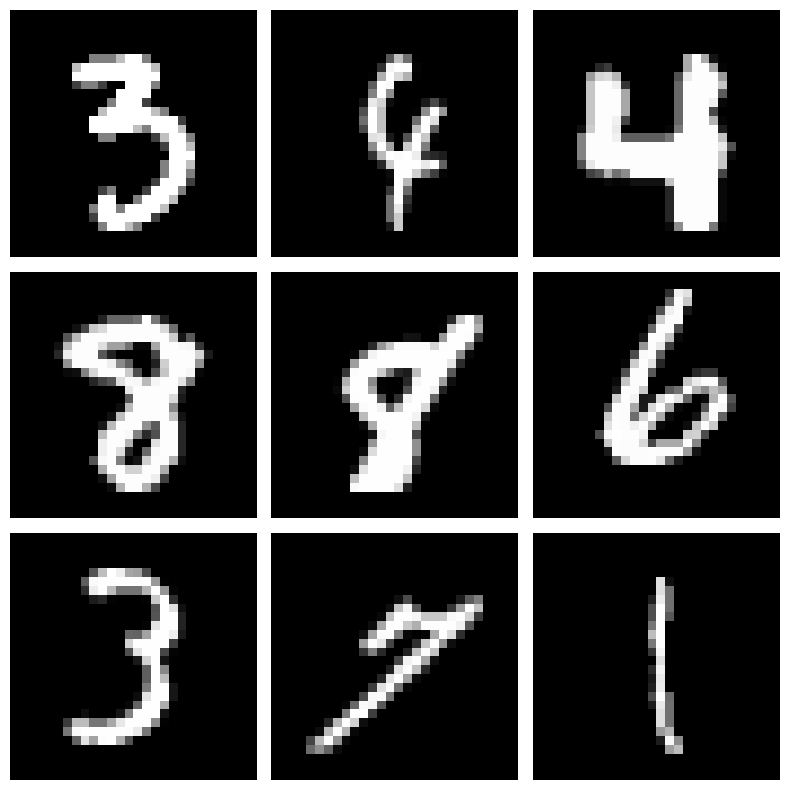

In [7]:
# Get a batch of images
images, labels = next(iter(train_loader))

# Plot the images
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
axes = axes.flatten()

for img, ax in zip(images, axes):
    img = img.squeeze()  # Remove the channel dimension
    ax.imshow(img, cmap='gray')
    ax.axis('off')

plt.tight_layout()
plt.show()


In [8]:
model_input = torch.rand((32, 1, 28, 28))
output = model(model_input)
print(output.shape)

torch.Size([32, 10])


In [9]:
y_train = F.one_hot(y_train, num_classes=10)

In [10]:
print(y_train[:2])
print(y_train.shape)

tensor([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]])
torch.Size([32, 10])
